# IPL ANALYSIS
### 1.Perform Munging on a common column

2. Do the following tasks

    a. Find which team has won the IPL maximum times.

    b. Find the orange cap and purple cap winners in each of the series.

    c. As a captian, find out whose performance is the best.

      Captians performance is calculated on the following criteria.

      (i) No of times the team has reached Top 4
      (ii) Total no of matches won/total number of matches played under his captancy

      (iii) Captian's individual performace.

      (iv) No. of times the captian has won the trophy

    d. Find out who is the hard hitter in the past 10 years.(Give a list of top 3 hard hitters)

    e. Compare and contrast the performance of RCB over any team of your choice on the following criteria

      (i)   No of sixs

      (ii)  No of fours
      
      (iii) Centuries

      (iv)  Half centuries

      (v)   Hat tricks

      (vi)  Consistent running between the wickets.
            
    f. Compare and contrast any three bowlers,batters and wicket keepers belonging to each team and analyse their strength and weaknesses.

In [114]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df1 = pd.read_csv("IPL_Ball_by_Ball_2008_2020.csv", encoding = "UTF8")
df1.head()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [116]:
df2 = pd.read_csv("IPL_Matches_2008_2020.csv", encoding = "UTF8")
df2.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [117]:
# MUNGING on the id column
df_comb = pd.merge(df1, df2, on="id", how="inner")
df_comb

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


# 1. Find which team has won the IPL maximum times.

In [118]:
# Find which team has won the IPL maximum times.
winning_team = df_comb['winner'].mode().values[0]
print(f"{winning_team} has won the IPL maximum times.")

Mumbai Indians has won the IPL maximum times.


# 2. Find the orange cap and purple cap winners in each of the series.


In [119]:
# Geting the column series
df_comb_series = pd. DatetimeIndex(df_comb["date"]).year
df_comb_series

Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='date', length=193468)

In [120]:
d1 = pd.Series(df_comb_series)
d2= df_comb['id']

dd = pd.concat([d2, d1], axis=1)
dd.rename(columns = {'date':'series'}, inplace = True)
dd

,id,series
0,335982,2008
1,335982,2008
2,335982,2008
3,335982,2008
4,335982,2008
...,...,...
193463,1237181,2020
193464,1237181,2020
193465,1237181,2020
193466,1237181,2020


In [121]:
df_comb = pd.merge(dd, df_comb, on ='id') # matches by = “m_id”
df_comb

,id,series,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46278819,1237181,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
46278820,1237181,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
46278821,1237181,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
46278822,1237181,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [122]:
df_comb.columns

Index(['id', 'series', 'inning', 'over', 'ball', 'batsman', 'non_striker',
       'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
       'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder',
       'extras_type', 'batting_team', 'bowling_team', 'city', 'date',
       'player_of_match', 'venue', 'neutral_venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [159]:
#Orange Cao
series_batsman_runs = df_comb.groupby(['series', 'batsman'])['batsman_runs'].sum().reset_index()


max_runs_by_series = series_batsman_runs.groupby('series')['batsman_runs'].idxmax()
max_runs_by_series



series
2008     115
2009     229
2010     446
2011     502
2012     684
2013     910
2014    1088
2015    1130
2016    1383
2017    1422
2018    1594
2019    1694
2020    1866
Name: batsman_runs, dtype: int64

In [161]:
result = series_batsman_runs.loc[max_runs_by_series]
print(result)
result.columns = ['series', 'Batsman', 'Score']

result = series_batsman_runs.loc[max_runs_by_series]

print("The Orange cap winners are: \n")
for index, row in result.iterrows():
    print(f"Player: {row['batsman']}, \nYear: {row['series']}\n\n")

      series        batsman  batsman_runs
115     2008       SE Marsh        148301
229     2009      ML Hayden        134190
446     2010   SR Tendulkar        151363
502     2011       CH Gayle        143423
684     2012       CH Gayle        180160
910     2013     MEK Hussey        175240
1088    2014     RV Uthappa        156787
1130    2015      AM Rahane        133001
1383    2016        V Kohli        231573
1422    2017      DA Warner        150568
1594    2018  KS Williamson        178401
1694    2019      DA Warner        166591
1866    2020       KL Rahul        161866
The Orange cap winners are: 

Player: SE Marsh, 
Year: 2008


Player: ML Hayden, 
Year: 2009


Player: SR Tendulkar, 
Year: 2010


Player: CH Gayle, 
Year: 2011


Player: CH Gayle, 
Year: 2012


Player: MEK Hussey, 
Year: 2013


Player: RV Uthappa, 
Year: 2014


Player: AM Rahane, 
Year: 2015


Player: V Kohli, 
Year: 2016


Player: DA Warner, 
Year: 2017


Player: KS Williamson, 
Year: 2018


Player: DA Warn

In [124]:
#Purple Cap
series_bowler_runs = df_comb.groupby(['series', 'bowler'])['is_wicket'].sum().reset_index()


max_runs_by_series = series_bowler_runs.groupby('series')['is_wicket'].idxmax()

result = series_bowler_runs.loc[max_runs_by_series]
result.columns = ['series', 'Bowler', 'Wickets']


# print(result)

result = series_bowler_runs.loc[max_runs_by_series]

print("The Purple cap winners are: \n")
for index, row in result.iterrows():
    print(f"Player: {row['bowler']}, \nYear: {row['series']}\n\n")

The Purple cap winners are: 

Player: Sohail Tanvir, 
Year: 2008


Player: RP Singh, 
Year: 2009


Player: PP Ojha, 
Year: 2010


Player: SL Malinga, 
Year: 2011


Player: SP Narine, 
Year: 2012


Player: DJ Bravo, 
Year: 2013


Player: MM Sharma, 
Year: 2014


Player: DJ Bravo, 
Year: 2015


Player: B Kumar, 
Year: 2016


Player: B Kumar, 
Year: 2017


Player: AJ Tye, 
Year: 2018


Player: K Rabada, 
Year: 2019


Player: K Rabada, 
Year: 2020




In [125]:
df_comb.columns

Index(['id', 'series', 'inning', 'over', 'ball', 'batsman', 'non_striker',
       'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
       'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder',
       'extras_type', 'batting_team', 'bowling_team', 'city', 'date',
       'player_of_match', 'venue', 'neutral_venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

# 3. As a captian, find out whose performance is the best.

### Captians performance is calculated on the following criteria.

#####       (i) No of times the team has reached Top 4


In [126]:
Captains = ['MS Dhoni','KL Rahul']
table = pd.pivot_table(df_comb,index=['batsman', 'batting_team'],columns=['bowling_team'],values=['batsman_runs', 'id'], aggfunc={'batsman_runs':[np.sum]},fill_value=0)
table

batsman_runs  \
                                                           sum   
bowling_team                               Chennai Super Kings   
batsman        batting_team                                      
A Ashish Reddy Deccan Chargers                             735   
               Sunrisers Hyderabad                       10344   
A Chandila     Rajasthan Royals                              0   
A Chopra       Kolkata Knight Riders                         0   
A Choudhary    Royal Challengers Bangalore                   0   
...                                                        ...   
Yuvraj Singh   Royal Challengers Bangalore                8960   
               Sunrisers Hyderabad                           0   
Z Khan         Delhi Daredevils                              0   
               Mumbai Indians                             2396   
               Royal Challengers Bangalore                7100   

                                                                           \
                                                                            
bowling_team                               Deccan Chargers Delhi Capitals   
batsman        batting_team                                                 
A Ashish Reddy Deccan Chargers                           0              0   
               Sunrisers Hyderabad                       0              0   
A Chandila     Rajasthan Royals                          0              0   
A Chopra       Kolkata Knight Riders                  8237              0   
A Choudhary    Royal Challengers Bangalore               0              0   
...                                                    ...            ...   
Yuvraj Singh   Royal Challengers Bangalore               0              0   
               Sunrisers Hyderabad                       0              0   
Z Khan         Delhi Daredevils                          0              0   
               Mumbai Indians                         1008              0   
               Royal Challengers Bangalore               0              0   

                                                                           \
                                                                            
bowling_team                               Delhi Daredevils Gujarat Lions   
batsman        batting_team                                                 
A Ashish Reddy Deccan Chargers                            0             0   
               Sunrisers Hyderabad                     8608             0   
A Chandila     Rajasthan Royals                           0             0   
A Chopra       Kolkata Knight Riders                   3094             0   
A Choudhary    Royal Challengers Bangalore                0          3180   
...                                                     ...           ...   
Yuvraj Singh   Royal Challengers Bangalore            28892             0   
               Sunrisers Hyderabad                    21901          3146   
Z Khan         Delhi Daredevils                           0             0   
               Mumbai Indians                             0             0   
               Royal Challengers Bangalore              944             0   

                                                            \
                                                             
bowling_team                               Kings XI Punjab   
batsman        batting_team                                  
A Ashish Reddy Deccan Chargers                        1968   
               Sunrisers Hyderabad                    7042   
A Chandila     Rajasthan Royals                          0   
A Chopra       Kolkata Knight Riders                   496   
A Choudhary    Royal Challengers Bangalore             960   
...                                                    ...   
Yuvraj Singh   Royal Challengers Bangalore            9165   
               Sunrisers Hyderabad                   13851   
Z K

In [127]:
for captain in Captains:
    query = f"batsman == '{captain}'"
    cap = batsman_score.query(query)
    print(cap)

                                        batsman_runs                  \
                                                 sum                   
bowling_team                     Chennai Super Kings Deccan Chargers   
batsman  batting_team                                                  
MS Dhoni Rising Pune Supergiants                   0               0   
         Rising Pune Supergiant                    0               0   
         Chennai Super Kings                       0           67358   

                                                                  \
                                                                   
bowling_team                     Delhi Capitals Delhi Daredevils   
batsman  batting_team                                              
MS Dhoni Rising Pune Supergiants              0             6696   
         Rising Pune Supergiant               0             3731   
         Chennai Super Kings              24278           106734   

                  

##### (ii) Total no of matches won/total number of matches played under his captancy

In [168]:
dhoni_matches_by_series = {}

# Iterate through each series
seriess = df_comb['series'].unique()
for series in seriess:
    # Filter the DataFrame for the current series and MS Dhoni as the batsman
    dhoni_matches = df_comb[(df_comb['batsman'] == "MS Dhoni") & (df_comb['series'] == series)]
csk_wins_as_dhoni = dhoni_matches[dhoni_matches['winner'] == "Chennai Super Kings"]

count = 0
count = len(csk_wins_as_dhoni)

print(count)

9736


##### (iii) Captian's individual performace.

In [132]:
dhoni_data = df_comb[df_comb['batsman'] == "MS Dhoni"]

result = dhoni_data.groupby('batsman')['total_runs'].sum().sort_values(ascending=False)

print(result)


batsman
MS Dhoni    1176658
Name: total_runs, dtype: int64


In [167]:
rahul_data = df_comb[df_comb['batsman'] == "KL Rahul"]

# result = rahul_data.groupby('batsman')['total_runs'].sum().sort_values(ascending=False)
result = rahul_data['total_runs'].sum()
print(result)

662449


MS Dhoni has scored more runs compared to KL Rahul.

##### (iv) No. of times the captian has won the trophy

## 4. Find out who is the hard hitter in the past 10 years.(Give a list of top 3 hard hitters)

In [134]:
list(df_comb.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:3].index)

['V Kohli', 'SK Raina', 'RG Sharma']

## 5. Compare and contrast the performance of RCB over any team of your choice on the following criteria

##### a. No of sixs

In [135]:
data = df_comb[df_comb['batsman_runs'] == 6].groupby('batting_team').count()['id'].sort_values(ascending=False)
data
# From the info we can arrive at a conclusion that compared to RCB Mumbai Indians has scored more sixes and the rest of the teams scored less sixes.



batting_team
Mumbai Indians                 298923
Royal Challengers Bangalore    285272
Kings XI Punjab                256722
Chennai Super Kings            254196
Kolkata Knight Riders          241658
Delhi Daredevils               188623
Rajasthan Royals               187431
Sunrisers Hyderabad            146187
Deccan Chargers                 96578
Pune Warriors                   47720
Delhi Capitals                  42992
Gujarat Lions                   36776
Rising Pune Supergiant          21558
Rising Pune Supergiants         16111
Kochi Tuskers Kerala            12026
Name: id, dtype: int64

##### b. No of fours

In [136]:
data = df_comb[df_comb['batsman_runs'] == 4].groupby('batting_team').count()['id'].sort_values(ascending=False)
data

# From the info,we can say that MI,Kings XI Punjab and KKR scored more sixes than RCB.

batting_team
Mumbai Indians                 677491
Kings XI Punjab                628820
Kolkata Knight Riders          622912
Royal Challengers Bangalore    600079
Chennai Super Kings            571981
Rajasthan Royals               526551
Delhi Daredevils               509586
Sunrisers Hyderabad            395088
Deccan Chargers                231219
Pune Warriors                  126699
Delhi Capitals                 115538
Gujarat Lions                  108912
Rising Pune Supergiant          47718
Rising Pune Supergiants         39863
Kochi Tuskers Kerala            39228
Name: id, dtype: int64

#### c. Centuries

In [137]:
# Calculate the total runs scored by each batting team in each game
runs = df_comb.groupby(['batting_team', 'id'])['batsman_runs'].sum()

# Count the number of games where the team scored 100 or more runs
centuries_count = (runs >= 100).groupby('batting_team').sum().sort_values(ascending=False)[:10]

print(centuries_count)

batting_team
Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               160
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Name: batsman_runs, dtype: int64


##### From the above Series, we can see that Mumbai Indians has a century count of 203 followed by RCB which is 195.

##### d.  Half centuries


In [138]:
# Half centuries
data_half = runs[runs >= 50].droplevel(level=1).groupby('batting_team').count().sort_values(ascending=False)[:10]
print(data_half)



batting_team
Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               160
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Name: batsman_runs, dtype: int64


#### Half Century conclusion comes the same as Century that Mumbai Indians has a century count of 203 followed by RCB which is 195.

##### e.  Hat tricks


##### f. Consistent running between the wickets.

In [139]:
# Consistent running between the wickets.
data_running = runs[runs <= 2].droplevel(level=1).groupby('batting_team').count().sort_values(ascending=False)[:10]
print(data_running)

Series([], Name: batsman_runs, dtype: int64)


## 6. Compare and contrast any three bowlers,batters and wicket keepers belonging to each team and analyse their strength and weaknesses.

In [140]:
# Most Run Scored by IPL Teams
data = df_comb.groupby(['batting_team'])['total_runs'].sum().sort_values(ascending=False)
data

batting_team
Mumbai Indians                 7817772
Royal Challengers Bangalore    7199639
Kings XI Punjab                7189884
Kolkata Knight Riders          6987983
Chennai Super Kings            6844091
Rajasthan Royals               5870961
Delhi Daredevils               5737588
Sunrisers Hyderabad            4630780
Deccan Chargers                2772977
Pune Warriors                  1537679
Delhi Capitals                 1292059
Gujarat Lions                  1151671
Rising Pune Supergiant          597237
Rising Pune Supergiants         482691
Kochi Tuskers Kerala            439821
Name: total_runs, dtype: int64

In [141]:
table = pd.pivot_table(df_comb,index=['batsman', 'batting_team'],columns=['bowling_team'],values=['batsman_runs', 'id'], aggfunc={'batsman_runs':[np.sum]},fill_value=0)
table

batsman_runs  \
                                                           sum   
bowling_team                               Chennai Super Kings   
batsman        batting_team                                      
A Ashish Reddy Deccan Chargers                             735   
               Sunrisers Hyderabad                       10344   
A Chandila     Rajasthan Royals                              0   
A Chopra       Kolkata Knight Riders                         0   
A Choudhary    Royal Challengers Bangalore                   0   
...                                                        ...   
Yuvraj Singh   Royal Challengers Bangalore                8960   
               Sunrisers Hyderabad                           0   
Z Khan         Delhi Daredevils                              0   
               Mumbai Indians                             2396   
               Royal Challengers Bangalore                7100   

                                                                           \
                                                                            
bowling_team                               Deccan Chargers Delhi Capitals   
batsman        batting_team                                                 
A Ashish Reddy Deccan Chargers                           0              0   
               Sunrisers Hyderabad                       0              0   
A Chandila     Rajasthan Royals                          0              0   
A Chopra       Kolkata Knight Riders                  8237              0   
A Choudhary    Royal Challengers Bangalore               0              0   
...                                                    ...            ...   
Yuvraj Singh   Royal Challengers Bangalore               0              0   
               Sunrisers Hyderabad                       0              0   
Z Khan         Delhi Daredevils                          0              0   
               Mumbai Indians                         1008              0   
               Royal Challengers Bangalore               0              0   

                                                                           \
                                                                            
bowling_team                               Delhi Daredevils Gujarat Lions   
batsman        batting_team                                                 
A Ashish Reddy Deccan Chargers                            0             0   
               Sunrisers Hyderabad                     8608             0   
A Chandila     Rajasthan Royals                           0             0   
A Chopra       Kolkata Knight Riders                   3094             0   
A Choudhary    Royal Challengers Bangalore                0          3180   
...                                                     ...           ...   
Yuvraj Singh   Royal Challengers Bangalore            28892             0   
               Sunrisers Hyderabad                    21901          3146   
Z Khan         Delhi Daredevils                           0             0   
               Mumbai Indians                             0             0   
               Royal Challengers Bangalore              944             0   

                                                            \
                                                             
bowling_team                               Kings XI Punjab   
batsman        batting_team                                  
A Ashish Reddy Deccan Chargers                        1968   
               Sunrisers Hyderabad                    7042   
A Chandila     Rajasthan Royals                          0   
A Chopra       Kolkata Knight Riders                   496   
A Choudhary    Royal Challengers Bangalore             960   
...                                                    ...   
Yuvraj Singh   Royal Challengers Bangalore            9165   
               Sunrisers Hyderabad                   13851   
Z K

In [142]:
batsman_score= table.sort_values(by=['batsman'],ascending=False)
batsman_score

batsman_runs  \
                                                           sum   
bowling_team                               Chennai Super Kings   
batsman        batting_team                                      
Z Khan         Royal Challengers Bangalore                7100   
               Mumbai Indians                             2396   
               Delhi Daredevils                              0   
Yuvraj Singh   Sunrisers Hyderabad                           0   
               Royal Challengers Bangalore                8960   
...                                                        ...   
A Choudhary    Royal Challengers Bangalore                   0   
A Chopra       Kolkata Knight Riders                         0   
A Chandila     Rajasthan Royals                              0   
A Ashish Reddy Sunrisers Hyderabad                       10344   
               Deccan Chargers                             735   

                                                                           \
                                                                            
bowling_team                               Deccan Chargers Delhi Capitals   
batsman        batting_team                                                 
Z Khan         Royal Challengers Bangalore               0              0   
               Mumbai Indians                         1008              0   
               Delhi Daredevils                          0              0   
Yuvraj Singh   Sunrisers Hyderabad                       0              0   
               Royal Challengers Bangalore               0              0   
...                                                    ...            ...   
A Choudhary    Royal Challengers Bangalore               0              0   
A Chopra       Kolkata Knight Riders                  8237              0   
A Chandila     Rajasthan Royals                          0              0   
A Ashish Reddy Sunrisers Hyderabad                       0              0   
               Deccan Chargers                           0              0   

                                                                           \
                                                                            
bowling_team                               Delhi Daredevils Gujarat Lions   
batsman        batting_team                                                 
Z Khan         Royal Challengers Bangalore              944             0   
               Mumbai Indians                             0             0   
               Delhi Daredevils                           0             0   
Yuvraj Singh   Sunrisers Hyderabad                    21901          3146   
               Royal Challengers Bangalore            28892             0   
...                                                     ...           ...   
A Choudhary    Royal Challengers Bangalore                0          3180   
A Chopra       Kolkata Knight Riders                   3094             0   
A Chandila     Rajasthan Royals                           0             0   
A Ashish Reddy Sunrisers Hyderabad                     8608             0   
               Deccan Chargers                            0             0   

                                                            \
                                                             
bowling_team                               Kings XI Punjab   
batsman        batting_team                                  
Z Khan         Royal Challengers Bangalore             221   
               Mumbai Indians                            0   
               Delhi Daredevils                          0   
Yuvraj Singh   Sunrisers Hyderabad                   13851   
               Royal Challengers Bangalore            9165   
...                                                    ...   
A Choudhary    Royal Challengers Bangalore             960   
A Chopra       Kolkata Knight Riders                   496   
A C

In [143]:
kohli=batsman_score.query("batsman == ['V Kohli']")
kohli


batsman_runs                  \
                                                    sum                   
bowling_team                        Chennai Super Kings Deccan Chargers   
batsman batting_team                                                      
V Kohli Royal Challengers Bangalore              209223           75793   

                                                                     \
                                                                      
bowling_team                        Delhi Capitals Delhi Daredevils   
batsman batting_team                                                  
V Kohli Royal Challengers Bangalore          33366           183934   

                                                                   \
                                                                    
bowling_team                        Gujarat Lions Kings XI Punjab   
batsman batting_team                                                
V Kohli Royal Challengers Bangalore         69034          150607   

                                                          \
                                                           
bowling_team                        Kochi Tuskers Kerala   
batsman batting_team                                       
V Kohli Royal Challengers Bangalore                11332   

                                                                          \
                                                                           
bowling_team                        Kolkata Knight Riders Mumbai Indians   
batsman batting_team                                                       
V Kohli Royal Challengers Bangalore                171886         157306   

                                                                    \
                                                                     
bowling_team                        Pune Warriors Rajasthan Royals   
batsman batting_team                                                 
V Kohli Royal Challengers Bangalore         31584           108609   

                                                            \
                                                             
bowling_team                        Rising Pune Supergiant   
batsman batting_team                                         
V Kohli Royal Challengers Bangalore                  20475   

                                                             \
                                                              
bowling_team                        Rising Pune Supergiants   
batsman batting_team                                          
V Kohli Royal Challengers Bangalore                   46672   

                                                                 \
                                                                  
bowling_team                        Royal Challengers Bangalore   
batsman batting_team                                              
V Kohli Royal Challengers Bangalore                           0   

                                                         
                                                         
bowling_team                        Sunrisers Hyderabad  
batsman batting_team                                     
V Kohli Royal Challengers Bangalore              123429

In [144]:
dhoni=batsman_score.query("batsman == ['MS Dhoni']")
dhoni



batsman_runs                  \
                                                 sum                   
bowling_team                     Chennai Super Kings Deccan Chargers   
batsman  batting_team                                                  
MS Dhoni Rising Pune Supergiants                   0               0   
         Rising Pune Supergiant                    0               0   
         Chennai Super Kings                       0           67358   

                                                                  \
                                                                   
bowling_team                     Delhi Capitals Delhi Daredevils   
batsman  batting_team                                              
MS Dhoni Rising Pune Supergiants              0             6696   
         Rising Pune Supergiant               0             3731   
         Chennai Super Kings              24278           106734   

                                                                \
                                                                 
bowling_team                     Gujarat Lions Kings XI Punjab   
batsman  batting_team                                            
MS Dhoni Rising Pune Supergiants         12686           16237   
         Rising Pune Supergiant           7524            1235   
         Chennai Super Kings                 0          128110   

                                                                             \
                                                                              
bowling_team                     Kochi Tuskers Kerala Kolkata Knight Riders   
batsman  batting_team                                                         
MS Dhoni Rising Pune Supergiants                    0                  6748   
         Rising Pune Supergiant                     0                  6687   
         Chennai Super Kings                     4985                101890   

                                                               \
                                                                
bowling_team                     Mumbai Indians Pune Warriors   
batsman  batting_team                                           
MS Dhoni Rising Pune Supergiants           5760             0   
         Rising Pune Supergiant           17239             0   
         Chennai Super Kings             142647         33039   

                                                                          \
                                                                           
bowling_team                     Rajasthan Royals Rising Pune Supergiant   
batsman  batting_team                                                      
MS Dhoni Rising Pune Supergiants                0                      0   
         Rising Pune Supergiant                 0                      0   
         Chennai Super Kings               117191                      0   

                                                          \
                                                           
bowling_team                     Rising Pune Supergiants   
batsman  batting_team                                      
MS Dhoni Rising Pune Supergiants                       0   
         Rising Pune Supergiant                        0   
         Chennai Super Kings                           0   

                                                              \
                                                               
bowling_team                     Royal Challengers Bangalore   
batsman  batting_team                                          
MS Dhoni Rising Pune Supergiants                       12610   
         Rising Pune Supergiant                        12145   
         Chennai Super Kings                          173222   

                                                      
                                                      
bowling_team                     Sunrisers Hyderabad  
batsman  batting_

In [145]:

yuvaraj=batsman_score.query("batsman == ['Yuvraj Singh']")
yuvaraj

batsman_runs                  \
                                                         sum                   
bowling_team                             Chennai Super Kings Deccan Chargers   
batsman      batting_team                                                      
Yuvraj Singh Sunrisers Hyderabad                           0               0   
             Royal Challengers Bangalore                8960               0   
             Pune Warriors                             24903            6057   
             Mumbai Indians                             1008               0   
             Kings XI Punjab                           37296           22835   
             Delhi Daredevils                           9272               0   

                                                                          \
                                                                           
bowling_team                             Delhi Capitals Delhi Daredevils   
batsman      batting_team                                                  
Yuvraj Singh Sunrisers Hyderabad                      0            21901   
             Royal Challengers Bangalore              0            28892   
             Pune Warriors                            0            24833   
             Mumbai Indians                       13038                0   
             Kings XI Punjab                          0            31332   
             Delhi Daredevils                         0                0   

                                                                        \
                                                                         
bowling_team                             Gujarat Lions Kings XI Punjab   
batsman      batting_team                                                
Yuvraj Singh Sunrisers Hyderabad                  3146           13851   
             Royal Challengers Bangalore             0            9165   
             Pune Warriors                           0           20658   
             Mumbai Indians                          0            4374   
             Kings XI Punjab                         0               0   
             Delhi Daredevils                        0           13662   

                                                               \
                                                                
bowling_team                             Kochi Tuskers Kerala   
batsman      batting_team                                       
Yuvraj Singh Sunrisers Hyderabad                            0   
             Royal Challengers Bangalore                    0   
             Pune Warriors                               1968   
             Mumbai Indians                                 0   
             Kings XI Punjab                                0   
             Delhi Daredevils                               0   

                                                                               \
                                                                                
bowling_team                             Kolkata Knight Riders Mumbai Indians   
batsman      batting_team                                                       
Yuvraj Singh Sunrisers Hyderabad                         24824          12151   
             Royal Challengers Bangalore                 13091           1512   
             Pune Warriors                               13012          18709   
             Mumbai Indians                                  0              0   
             Kings XI Punjab                             35494          19318   
             Delhi Daredevils                             4998          14418   

                                                                         \
                                                                          
bowling_team                             Pune Warriors Rajasthan Royals   
batsman      batting_team                                 

In [146]:
# Most Run Scored by Indivdual batsman
df_comb.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman
V Kohli           1393378
SK Raina          1287639
RG Sharma         1263611
DA Warner         1249963
S Dhawan          1248242
AB de Villiers    1167667
CH Gayle          1127685
MS Dhoni          1122668
RV Uthappa        1097816
G Gambhir          994890
Name: batsman_runs, dtype: int64

In [147]:
df_comb[df_comb['result_margin']>0].groupby(['winner'])['result_margin'].apply(np.mean).sort_values(ascending = False)

winner
Mumbai Indians                 20.563266
Delhi Capitals                 19.712678
Chennai Super Kings            19.614932
Royal Challengers Bangalore    19.407869
Sunrisers Hyderabad            17.016689
Deccan Chargers                16.922914
Kolkata Knight Riders          16.470663
Rising Pune Supergiant         15.880651
Rajasthan Royals               15.656412
Kings XI Punjab                15.499373
Pune Warriors                  15.119770
Delhi Daredevils               14.485292
Rising Pune Supergiants        12.630289
Kochi Tuskers Kerala            9.141476
Gujarat Lions                   4.986609
Name: result_margin, dtype: float64

<class 'pandas.core.series.Series'>


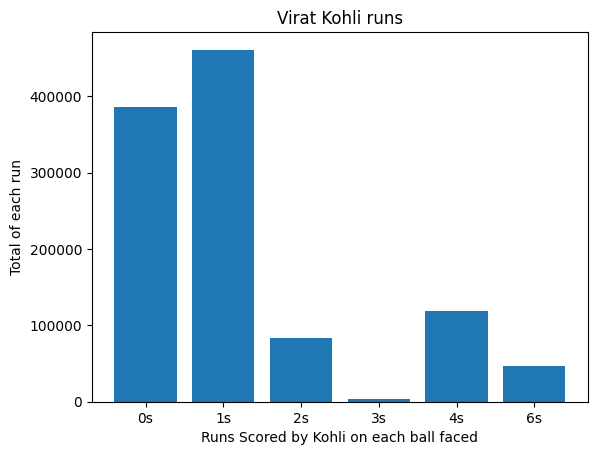

In [148]:


#RCB
#Batsman
# Virat Kohli
iplb_kohli = df_comb[df_comb['batsman'] == "V Kohli"]
iplb_kohli.head(3)

res = df_comb[df_comb['batsman'] =='V Kohli']
runs_scored = [res['batsman_runs'].sum()]

runs0_scored = res['batsman_runs'] == 0
runs1_scored = res['batsman_runs'] == 1
runs2_scored = res['batsman_runs'] == 2
runs3_scored = res['batsman_runs'] == 3
runs4_scored = res['batsman_runs'] == 4
runs6_scored = res['batsman_runs'] == 6

print(type(runs0_scored))
runs0_scored=runs0_scored.sum()
runs1_scored=runs1_scored.sum()
runs2_scored=runs2_scored.sum()
runs3_scored=runs3_scored.sum()
runs4_scored=runs4_scored.sum()
runs6_scored=runs6_scored.sum()

x = [runs0_scored, runs1_scored, runs2_scored, runs3_scored, runs4_scored, runs6_scored]
y = [0,1,2,3,4,6]
runs1_scored

x1 = [runs0_scored, runs1_scored, runs2_scored, runs3_scored, runs4_scored, runs6_scored]
y1 = ["0s","1s","2s","3s","4s","6s"]

#plt.plot(y,x)
plt.bar(y1, x1)
plt.xlabel("Runs Scored by Kohli on each ball faced")
plt.ylabel("Total of each run")
plt.title("Virat Kohli runs")
plt.show()



<class 'pandas.core.series.Series'>


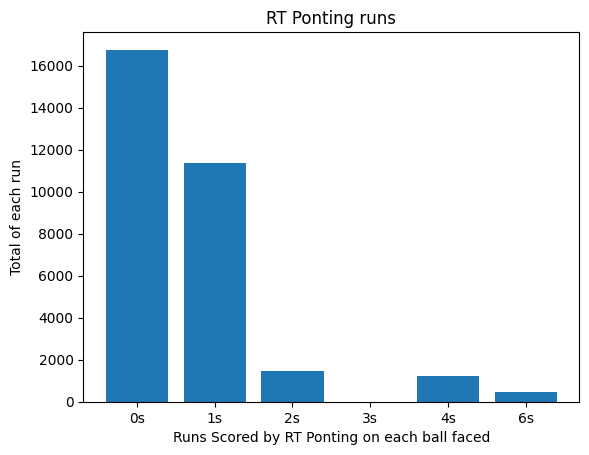

In [149]:
#RT Ponting Batsman
iplb_Ponting = df_comb[df_comb['batsman'] == "RT Ponting"]
iplb_Ponting.head(3)

res = df_comb[df_comb['batsman'] =='RT Ponting']
runs_scored = [res['batsman_runs'].sum()]

runs0_scored = res['batsman_runs'] == 0
runs1_scored = res['batsman_runs'] == 1
runs2_scored = res['batsman_runs'] == 2
runs3_scored = res['batsman_runs'] == 3
runs4_scored = res['batsman_runs'] == 4
runs6_scored = res['batsman_runs'] == 6

print(type(runs0_scored))
runs0_scored=runs0_scored.sum()
runs1_scored=runs1_scored.sum()
runs2_scored=runs2_scored.sum()
runs3_scored=runs3_scored.sum()
runs4_scored=runs4_scored.sum()
runs6_scored=runs6_scored.sum()

x = [runs0_scored, runs1_scored, runs2_scored, runs3_scored, runs4_scored, runs6_scored]
y = [0,1,2,3,4,6]
runs1_scored

x1 = [runs0_scored, runs1_scored, runs2_scored, runs3_scored, runs4_scored, runs6_scored]
y1 = ["0s","1s","2s","3s","4s","6s"]

#plt.plot(y,x)
plt.bar(y1, x1)
plt.xlabel("Runs Scored by RT Ponting on each ball faced")
plt.ylabel("Total of each run")
plt.title("RT Ponting runs")
plt.show()


In [150]:
# Bowlers Analysis
df_comb.groupby(['bowling_team','bowler'])['is_wicket'].sum().sort_values(ascending=False)[:10]


bowling_team                 bowler         
Mumbai Indians               SL Malinga         45420
Kolkata Knight Riders        SP Narine          34299
Mumbai Indians               Harbhajan Singh    33130
Chennai Super Kings          DJ Bravo           30619
Sunrisers Hyderabad          B Kumar            28805
Mumbai Indians               JJ Bumrah          28681
Royal Challengers Bangalore  YS Chahal          28554
Chennai Super Kings          R Ashwin           23664
                             RA Jadeja          21894
Delhi Daredevils             A Mishra           21668
Name: is_wicket, dtype: int64

In [151]:
# AA Noffke bowler analysis
iplb_Noffke = df_comb[df_comb['bowler'] == "AA Noffke"]
iplb_Noffke.head(3)

res = df_comb[df_comb['bowler'] == "AA Noffke"]
wickets_scored = 0
for is_wicket in res['is_wicket']:
    if is_wicket == 1:
        wickets_scored += 1

In [152]:
# Washington Sundar of Sunrisers Hyderabad

iplb_Sundar = df_comb[df_comb['bowler'] == "Washington Sundar"]
iplb_Sundar.head(3)

res = df_comb[df_comb['bowler'] == "Washington Sundar"]
wickets_scored = 0
for is_wicket in res['is_wicket']:
    if is_wicket == 1:
        wickets_scored += 1

print(f"The total wickets scored by Washington Sundar is {wickets_scored}")

The total wickets scored by Washington Sundar is 6305


In [153]:

table1 = pd.pivot_table(df_comb,index=['bowling_team','bowler'],values=['is_wicket'], aggfunc={'is_wicket':[np.sum]},fill_value=0)
table1

is_wicket
                                          sum
bowling_team        bowler                   
Chennai Super Kings A Flintoff            464
                    A Nehra              8042
                    AS Rajpoot            252
                    B Laughlin            252
                    BW Hilfenhaus        5438
...                                       ...
Sunrisers Hyderabad TA Boult             2689
                    V Shankar            1441
                    Y Venugopal Rao         0
                    YK Pathan             240
                    Yuvraj Singh          490

[744 rows x 1 columns]

In [154]:
# total matches played in each seriess
# data = df_comb.groupby(['id','series']).count().index.droplevel(level=0).value_counts().sort_index()
# data #Series

In [155]:
# total matches played in a venue
# venues_count=df_comb.groupby(['venue','id']).count().droplevel(level=1).index.value_counts()
# top10_venues =venues_count.head(10)
# top10_venues

In [156]:
# cols = [ 'over', 'batsman_runs']
# pd.pivot_table(df_comb, values = cols, index=['batsman'])

In [157]:
# res_df = pd.pivot_table(df_comb,index=['batsman', 'batting_team'],values=['batsman_runs'],aggfunc=np.sum)
# res_df

In [158]:
# batsman_score= res_df.sort_values(by=['batsman_runs'],ascending=False)
# batsman_score